In [ ]:
#@title Step 1: Clone repository and install dependencies.


In [1]:
!git clone https://github.com/stefanopini/simple-HRNet.git

Cloning into 'simple-HRNet'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 323 (delta 6), reused 8 (delta 2), pack-reused 302
Receiving objects: 100% (323/323), 78.02 MiB | 23.69 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
%cd simple-HRNet/
!pip install pip install -q -r requirements.txt

/content/simple-HRNet
     |████████████████████████████████| 110 kB 6.9 MB/s 
     |████████████████████████████████| 124 kB 39.5 MB/s 
     |████████████████████████████████| 1.9 MB 36.8 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 360 kB 46.8 MB/s 
     |████████████████████████████████| 270 kB 52.5 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 62 kB 863 kB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 167 kB 34.7 MB/s 
     |████████████████████████████████| 1.9 MB 35.6 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 6.3 MB 21.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have r

In [ ]:
#@title Adding yolov3 module

In [3]:
!git submodule update --init --recursive

Submodule 'models/detectors/yolo' (https://github.com/eriklindernoren/PyTorch-YOLOv3) registered for path 'models/detectors/yolo'
Cloning into '/content/simple-HRNet/models/detectors/yolo'...
Submodule path 'models/detectors/yolo': checked out '47b7c912877ca69db35b8af3a38d6522681b3bb3'


In [ ]:
#@title Install requirements


In [4]:
%cd /content/simple-HRNet/models/detectors/yolo
!pip install -q -r requirements.txt

/content/simple-HRNet/models/detectors/yolo


In [ ]:
#@title Download yolov3 weights


In [5]:
%cd /content/simple-HRNet/models/detectors/yolo/weights
!sh download_weights.sh

/content/simple-HRNet/models/detectors/yolo/weights
--2021-09-30 15:58:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.5MB/s    in 11s     

2021-09-30 15:58:35 (21.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2021-09-30 15:58:35--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  15.8MB/s    in 2.1s    

2021-09-30 15:58:38 (15.8 MB/s) - ‘y

In [ ]:
#@title Step 2: Download HRNet pre-trained weights


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import glob
w_list = glob.glob("/content/drive/MyDrive/POSE_HRNET/pose_hrnet_w48_384x288.pth")
if not w_list:
  raise FileNotFoundError("You haven't downloaded any pre-trained weights!")
print("You are good to go!")

You are good to go!


In [ ]:
#@title Step 3: Run code


In [8]:
%cd /content/simple-HRNet
import cv2
from PIL import Image
import requests
from skimage import io
from SimpleHRNet import SimpleHRNet

model = SimpleHRNet(48, 17, "/content/drive/MyDrive/POSE_HRNET/pose_hrnet_w48_384x288.pth")
#url = 'http://images.cocodataset.org/val2017/000000097278.jpg'
#im = Image.open(requests.get(url, stream=True).raw)
#image = io.imread(url)

image = cv2.imread('/content/drive/MyDrive/Cloth_Parsing/archive (3)/images/0003.jpg')

joints = model.predict(image)

/content/simple-HRNet
device: 'cpu'


In [9]:
def plot3d(ax, output):
    bones = (
            (0,1), (0,2), (1,3), (2,4),  # spine + head
            (5,7), (7,9), (6,8), (8,10), # arms
            (11,13), (13,15), (12,14), (14,16), # legs
            (11,12), (6,12), (5,11), (5,6), (0,5), (0,6) # assist
        )

    for bone in bones:
        xS = [output[:,bone[0],1], output[:,bone[1],1]]
        yS = [output[:,bone[0],0], output[:,bone[1],0]]
        ax.plot(xS, yS, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:,:,1],joints[:,:,0], s=20, c='r')

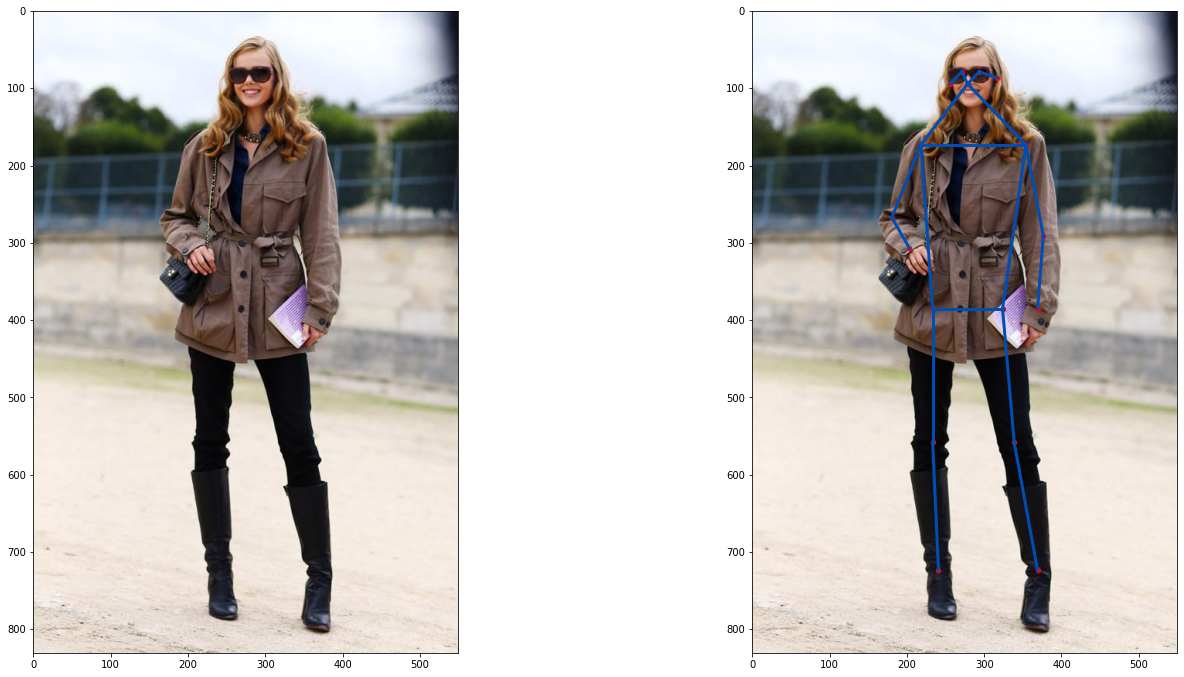

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
#ax.imshow(Image.open(requests.get(url, stream=True).raw))
ax.imshow(Image.open('/content/drive/MyDrive/Cloth_Parsing/archive (3)/images/0003.jpg'))

ax = fig.add_subplot(122)
#ax.imshow(Image.open(requests.get(url, stream=True).raw))
ax.imshow(Image.open('/content/drive/MyDrive/Cloth_Parsing/archive (3)/images/0003.jpg'))

plot3d(ax, joints)
plt.show()

In [47]:
!python scripts/extract-keypoints.py --image_resolution /content/drive/MyDrive/Cloth_Parsing/archive (3)/images/0003.jpg

Traceback (most recent call last):
  File "scripts/extract-keypoints.py", line 152, in <module>
    main(**args.__dict__)
  File "scripts/extract-keypoints.py", line 29, in main
    image_resolution = ast.literal_eval(image_resolution)
  File "/usr/lib/python3.7/ast.py", line 46, in literal_eval
    node_or_string = parse(node_or_string, mode='eval')
  File "/usr/lib/python3.7/ast.py", line 35, in parse
    return compile(source, filename, mode, PyCF_ONLY_AST)
  File "<unknown>", line 1
    /content/drive/MyDrive/Cloth_Parsing/archive (3)/images/0003.jpg
    ^
SyntaxError: invalid syntax


In [36]:
!python scripts/extract-keypoints.py --help

usage: extract-keypoints.py [-h] [--format FORMAT] [--filename FILENAME]
                            [--hrnet_m HRNET_M] [--hrnet_c HRNET_C]
                            [--hrnet_j HRNET_J]
                            [--hrnet_weights HRNET_WEIGHTS]
                            [--image_resolution IMAGE_RESOLUTION]
                            [--single_person] [--use_tiny_yolo]
                            [--max_batch_size MAX_BATCH_SIZE]
                            [--csv_output_filename CSV_OUTPUT_FILENAME]
                            [--csv_delimiter CSV_DELIMITER]
                            [--json_output_filename JSON_OUTPUT_FILENAME]
                            [--device DEVICE]

Extract and save keypoints in csv or json format. csv format is:
frame_index,detection_index,<point 0>,<point 1>,...,<point hrnet_j> where each
<point N> corresponds to three elements: y_coordinate,x_coordinate,confidence
json format is: {frame_index: [[<point 0>,<point 1>,...,<point hrnet_j>],
...], ...}